# TASK1

In [59]:
from google.colab import drive
#If need to determine whether to mix manual and natural datasets, change this path to mixed.faa
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/4ML/MSA_nat_with_annotation.faa'
art_file_path = '/content/drive/MyDrive/4ML/MSA_art.faa'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np

# 定义标准氨基酸表
AMINO_ACIDS = "ACDEFGHIKLMNPQRSTVWY"
AMINO_MAP = {aa: i for i, aa in enumerate(AMINO_ACIDS)}

def parse_fasta(file_path):
    sequences = []
    labels = []
    current_seq = []
    current_label = None

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(">"):  # Header line
                if current_seq and current_label is not None:
                    sequences.append("".join(current_seq))
                    labels.append(current_label)
                    current_seq = []

                # Extract label
                if "functional_true" in line:
                    current_label = 1.0
                elif "functional_false" in line:
                    current_label = 0.0
                else:
                    #raise ValueError(f"Unknown functional label in header: {line}")
                    current_label = 2.0
            else:
                # Sequence line
                current_seq.append(line)

        # Append the last sequence
        if current_seq and current_label is not None:
            sequences.append("".join(current_seq))
            labels.append(current_label)

    return sequences, labels

def one_hot_encode_sequence(sequence):
    """将蛋白质序列转换为独热编码"""
    one_hot = np.zeros((len(sequence), 20), dtype=int)
    for i, aa in enumerate(sequence):
        if aa in AMINO_MAP:
            one_hot[i, AMINO_MAP[aa]] = 1
    return one_hot

def process_fasta(file_path):
    sequences, labels = parse_fasta(file_path)
    encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
    return encoded_sequences, np.array(labels)


In [61]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 输出所有结果
temp_se,temp_labels = process_fasta(art_file_path)
print(temp_se)


[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
   

# TASK2

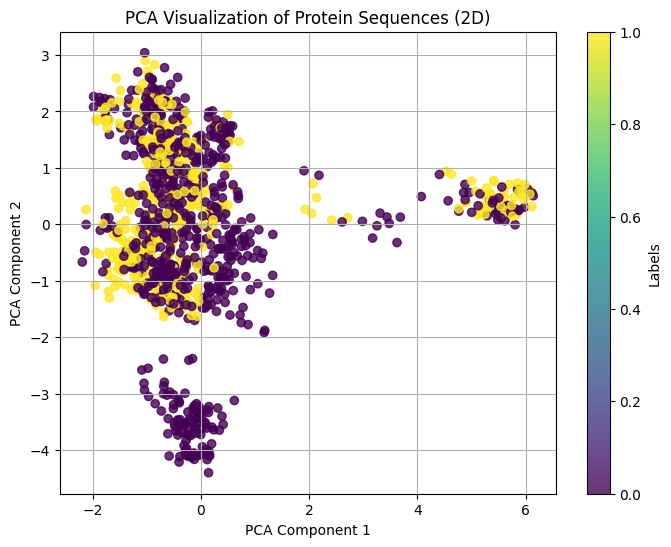

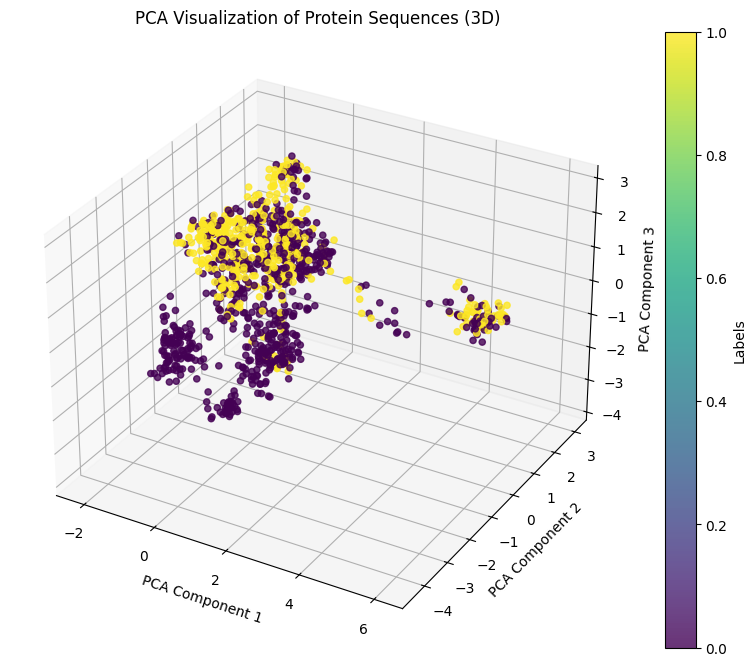

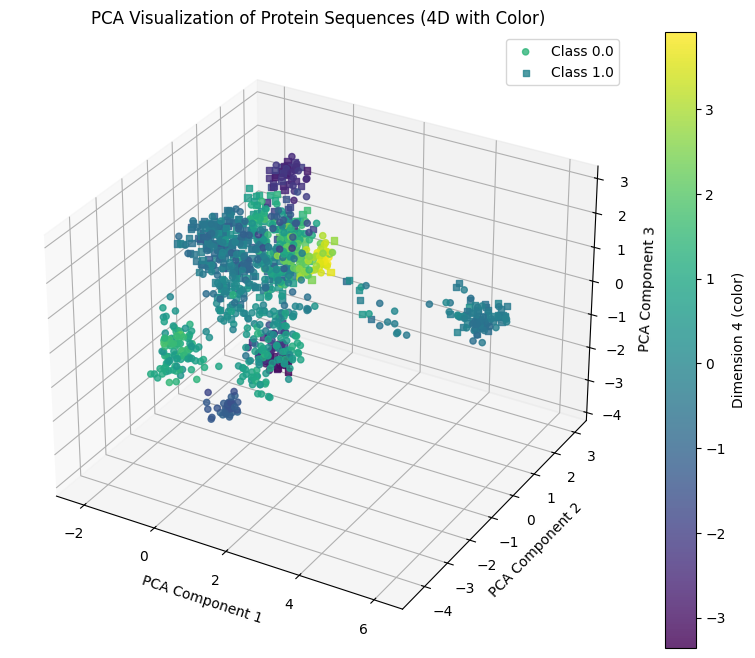

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_pca(data, labels, title="PCA Visualization"):
    """
    可视化 PCA 降维结果的函数。

    参数:
    - data: PCA 降维后的数据，形状为 (n_samples, n_components)，支持 2D 或更高维度
    - labels: 每个样本的类别标签，形状为 (n_samples,)
    - title: 图形标题（可选）
    """
    n_components = data.shape[1]
    unique_labels = np.unique(labels)
    markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'h']  # 支持多类别的点形状
    if n_components == 2:
        # 二维可视化
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.8)
        plt.colorbar(scatter, label='Labels')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title(f'{title} (2D)')
        plt.grid(True)
        plt.show()

    elif n_components == 3:
        # 三维可视化
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', alpha=0.8)
        fig.colorbar(scatter, label='Labels')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (3D)')
        plt.show()
    elif n_components >= 4:
        # 四维可视化，使用颜色表示第 4 维，形状表示类别
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i, label in enumerate(unique_labels):
            idx = labels == label
            scatter = ax.scatter(data[idx, 0], data[idx, 1], data[idx, 2],
                                  c=data[idx, 3], cmap='viridis',
                                  marker=markers[i % len(markers)], alpha=0.8, label=f'Class {label}')
        cbar = fig.colorbar(scatter, ax=ax, label='Dimension 4 (color)')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (4D with Color)')
        ax.legend()
        plt.show()
    else:
        print("PCA 降维结果必须至少有两维数据用于可视化。")

def Pca_visual(encoded_sequences, labels,components):
    """
    使用PCA进行降维并可视化序列数据。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 对应的功能性标签 (0表示非功能性，1表示功能性)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至3个主成分
    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(encoded_sequences)
    visualize_pca(pca_result, labels, title="PCA Visualization of Protein Sequences")

# 读取FASTA文件、编码序列并进行PCA可视化
encoded_sequences, labels = process_fasta(file_path)
#pca_visualization(encoded_sequences, labels)
Pca_visual(encoded_sequences, labels,2)
Pca_visual(encoded_sequences, labels,3)
Pca_visual(encoded_sequences, labels,4)

<BarContainer object of 1130 artists>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

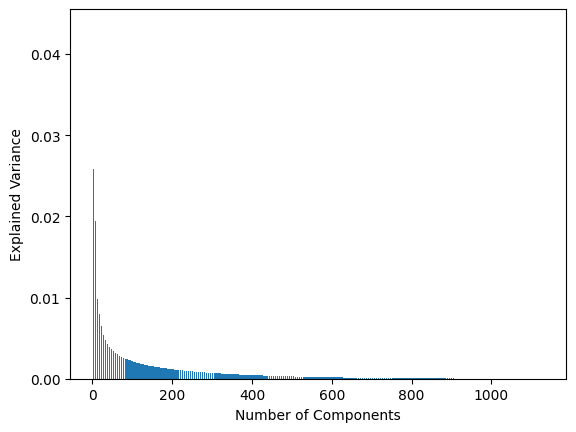

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

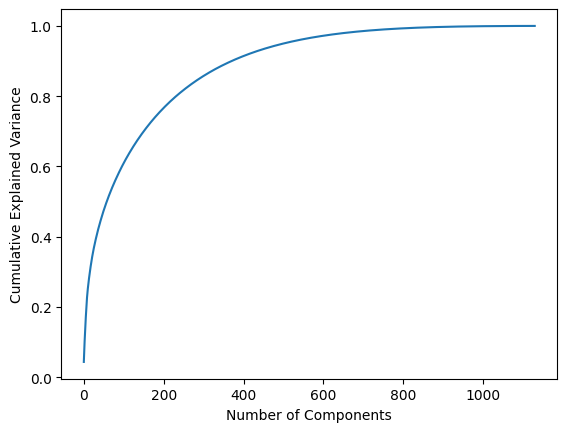

In [63]:
# Fit PCA without specifying the number of components to compute variance ratios for all components
X = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA().fit(X)

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Cumulative sum of explained variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# TASK3

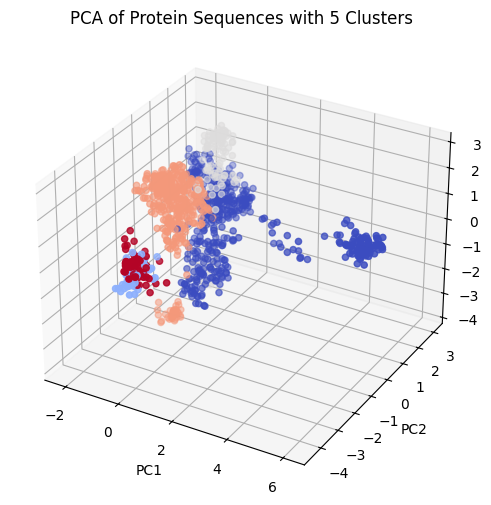

In [64]:
from sklearn.cluster import KMeans
def pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=2):
    """
    使用PCA进行降维、聚类并可视化结果。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 功能性标签 (0表示非功能性，1表示功能性)
    :param n_clusters: 聚类数 (默认3个聚类)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至20个主成分
    pca = PCA(n_components=600)
    pca_result = pca.fit_transform(encoded_sequences)

    # 使用KMeans聚类
    kmeans = KMeans(n_clusters=n_clusters,max_iter=2000000)
    cluster_labels = kmeans.fit_predict(pca_result)

    # 可视化PCA降维结果与聚类

    #根据聚类结果绘制数据点绘制三维图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='coolwarm')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('PCA Visualization of Protein Sequences')
    plt.title(f'PCA of Protein Sequences with {n_clusters} Clusters')
    plt.show()

encoded_sequences, labels = process_fasta(file_path)

pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=5)

In [65]:
#判断聚类的准确性，评判方法是把聚类结果映射到准确率最高的标签上
def evaluate_cluster_accuracy(true_labels, cluster_labels):
    """
    计算聚类结果的准确性。
    :param true_labels: 真实的标签
    :param cluster_labels: 聚类结果的标签
    :return: 聚类准确性
    """
    #标签从float转换为int
    true_labels = true_labels.astype(int)
    cluster_labels = cluster_labels.astype(int)
    # 计算每个聚类的主要标签
    cluster_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        counts = np.bincount(true_labels[mask])
        cluster_mapping[cluster] = np.argmax(counts)

    # 映射聚类标签到真实标签
    mapped_labels = np.array([cluster_mapping[label] for label in cluster_labels])

    # 计算准确性
    accuracy = np.mean(mapped_labels == true_labels)
    return accuracy
#生成聚类结果并评估准确性
#If need to determine whether to mix manual and natural datasets, change this path to mixed.faa
encoded_sequences, labels = process_fasta(file_path)
encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA(n_components=600)
pca_result = pca.fit_transform(encoded_sequences)
kmeans = KMeans(n_clusters=2,max_iter=2000000)
cluster_labels = kmeans.fit_predict(pca_result)
accuracy = evaluate_cluster_accuracy(labels, cluster_labels)
print(f"Cluster accuracy: {accuracy:.2f}")

[0 0 0 ... 0 0 0]
(1130,)
Cluster accuracy: 0.63


# TASK4

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F


class ProteinClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ProteinClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

def GetAndSavePCAAndScalerData(encoded_sequences,n_components=50):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)
    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)
    #归一化数据，使得数据的均值为0，方差为
    scaler1 = StandardScaler()
    sequences_scaled = scaler1.fit_transform(encoded_sequences)
    # PCA降维
    pca = PCA(n_components=n_components)
    sequences_pca = pca.fit_transform(sequences_scaled)
    #再次进行归一化
    scaler2 = StandardScaler()
    sequences_pca = scaler2.fit_transform(sequences_pca)
    return scaler1,scaler2,pca
def apply_pca(encoded_sequences,scaler1,scaler2,pca):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)

    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)

    #归一化数据，使得数据的均值为0，方差为
    sequences_scaled = scaler1.transform(encoded_sequences)
    # PCA降维
    sequences_pca = pca.transform(sequences_scaled)
    #再次进行归一化
    sequences_pca = scaler2.transform(sequences_pca)
    return sequences_pca


def prepare_data(train_data, test_data, use_pca=True, n_components=20):
    """
    根据是否使用PCA降维，准备训练和测试数据，转换为PyTorch的Tensor。
    """
    if use_pca:
        scaler1,scaler2,pca = GetAndSavePCAAndScalerData(train_data[0],n_components)
        X_train = apply_pca(train_data[0],scaler1,scaler2,pca)
        X_test = apply_pca(test_data[0],scaler1,scaler2,pca)
    else:
        X_train = train_data[0]
        X_test = test_data[0]

    # 转换为Tensor格式
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(train_data[1], dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(test_data[1], dtype=torch.float32).view(-1, 1)

    return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor


def train_model(model, train_loader, criterion, optimizer, device, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 反向传播 + 优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


def test_model(model, X_input, device):
    model.eval()
    y_pred = []

    with torch.no_grad():
        for inputs in X_input:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            y_pred.extend(predictions.cpu().numpy())

    return  y_pred



In [67]:

train_data = process_fasta(file_path)
test_data = process_fasta(art_file_path)

X_train, y_train, X_test, y_test = prepare_data(train_data, test_data, use_pca=True, n_components=40)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

input_dim = X_train.shape[1]
model = ProteinClassifier(input_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCELoss()  # 二分类交叉熵损失
#class_weights = torch.tensor([1.0, 2.0], dtype=torch.float32).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# 训练模型
train_model(model, train_loader, criterion, optimizer, device, num_epochs=200)

ProteinClassifier(
  (fc1): Linear(in_features=40, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Epoch [1/200], Loss: 0.7694
Epoch [2/200], Loss: 0.7433
Epoch [3/200], Loss: 0.7226
Epoch [4/200], Loss: 0.7028
Epoch [5/200], Loss: 0.6793
Epoch [6/200], Loss: 0.6620
Epoch [7/200], Loss: 0.6479
Epoch [8/200], Loss: 0.6543
Epoch [9/200], Loss: 0.6282
Epoch [10/200], Loss: 0.6073
Epoch [11/200], Loss: 0.5922
Epoch [12/200], Loss: 0.5886
Epoch [13/200], Loss: 0.5661
Epoch [14/200], Loss: 0.5523
Epoch [15/200], Loss: 0.5492
Epoch [16/200], Loss: 0.5454
Epoch [17/200], Loss: 0.5230
Epoch [18/200], Loss: 0.5161
Epoch [19/200], Loss: 0.5187
Epoch [20/200], Loss: 0.5129
Epoch [21/200], Loss: 0.5031
Epoch [22/200], Loss: 0.5011
Epoch [23/200], Loss: 0.4952
Epoch [24/200], Loss: 0.4991
Epoch [25/200], Loss: 0.4794
Epoch [26/200], Loss: 0.4733
Epoch [27/200], Loss: 0.4859
Epoch [28/200], Loss: 0.4793
Epoch [29/200], Loss: 0.4986
Epoch [30/200], Loss: 0.4597
Epoch [31/200], Loss: 0.4628
Epoch [32/200], Loss: 0.4760
Epoch [33/200], Loss: 0.4606
Epoch [34/200], Loss: 0.4471
Epoch [35/200], Loss: 0

[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

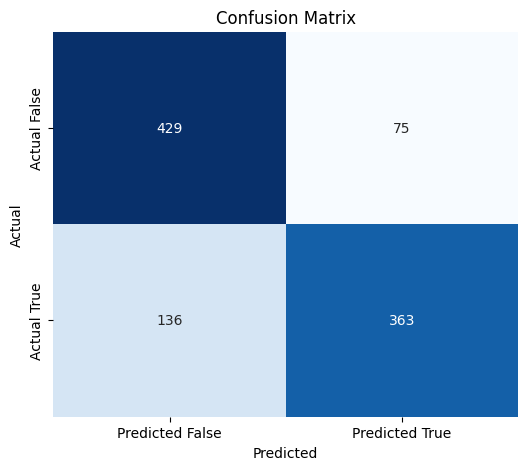

In [68]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
def evaluate_model(y_true, y_pred):
    """
    评估模型效果，输出混淆矩阵并提取 TP, FP, TN, FN
    :param y_true: 真实标签
    :param y_pred: 预测标签
    :return: None
    """
    # 计算混淆矩阵
    #y_true = y_true.to(device)
    #y_pred = y_pred.to(device)
    cm = confusion_matrix(y_true, y_pred)

    # 提取 TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # 输出混淆矩阵
    print("Confusion Matrix:")
    print(cm)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"True Positive (TP): {TP}")
    print(f"False Positive (FP): {FP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Negative (FN): {FN}")

    # 可视化混淆矩阵
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted False', 'Predicted True'],
                yticklabels=['Actual False', 'Actual True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
# 测试模型
y_pred = test_model(model, X_test, device)
print(y_pred)
# 将 PyTorch 张量转换为 NumPy 数组
y_true = y_test.cpu().numpy().flatten()  # 使用 flatten() 转换为一维数组
evaluate_model(y_true, y_pred)

# TASK5

In [69]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/4ML/functional_true.faa"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import random

#########################################
#            1. 数据处理                #
#########################################

# 假设你的蛋白质字母表(包含END或其他特殊符号)
AMINO_ACID_ALPHABET = 'ACDEFGHIKLMNPQRSTVWY-'  # 20个氨基酸 + '-'
AA_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACID_ALPHABET)}
IDX_TO_AA = {i: aa for aa, i in AA_TO_IDX.items()}

VOCAB_SIZE = len(AMINO_ACID_ALPHABET)   # 不额外加END，若要加可自己插入
SEQ_LEN = 96

class ProteinDataset(Dataset):
    """
    将蛋白质序列（长度固定为96）的文件读入，并存为 [seq_len] 的长整型索引张量
    """
    def __init__(self, file_path):
        self.sequences = []
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                seq = line.strip()
                if len(seq) == 0:
                    continue
                self.sequences.append(seq)

        # 将序列转成索引，并确保长度=96
        # 若实际序列长度<96可用某个符号补齐，也可直接断开
        self.data = []
        for seq in self.sequences:
            # 只取前96或截断/补齐
            seq = seq[:SEQ_LEN].ljust(SEQ_LEN, '-')
            # 转索引
            idx_list = [AA_TO_IDX.get(aa, AA_TO_IDX['-']) for aa in seq]
            self.data.append(torch.tensor(idx_list, dtype=torch.long))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


#########################################
#         2. 定义 Generator             #
#########################################
class ProteinGenerator(nn.Module):
    """
    输入: [batch_size, seq_len] (整数索引, 也可以是噪声)
    输出: [batch_size, seq_len, vocab_size] (logits)
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim, seq_len=96):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.seq_len = seq_len

    def forward(self, x):
        """
        x: [batch_size, seq_len], long
        返回 logits: [batch_size, seq_len, vocab_size]
        """
        emb = self.embedding(x)
        lstm_out, _ = self.lstm(emb)
        logits = self.fc(lstm_out)
        return logits

    @torch.no_grad()
    def sample(self, x, temperature=1.0):
        """
        推理/采样函数:
        直接返回 argmax 采样或 Gumbel-Softmax(无梯度)
        x: [batch_size, seq_len], long
        返回: [batch_size, seq_len], long
        """
        self.eval()
        logits = self.forward(x)  # [B, seq_len, vocab_size]
        if temperature == 1.0:
            # 简单argmax
            pred = logits.argmax(dim=-1)
        else:
            # softmax采样
            probs = F.softmax(logits / temperature, dim=-1)
            pred = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(logits.size(0), -1)
        return pred


#########################################
#        3. 定义 Discriminator          #
#########################################
class ProteinDiscriminator(nn.Module):
    """
    此处采用 one-hot输入 -> Linear -> LSTM -> FC
    因此需要在外部把真实/假序列都转成 one-hot float.
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.linear_in = nn.Linear(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x_onehot):
        """
        x_onehot: [batch_size, seq_len, vocab_size], float
        """
        emb = self.linear_in(x_onehot)      # [B, seq_len, embed_dim]
        lstm_out, _ = self.lstm(emb)
        out = self.fc(lstm_out[:, -1, :])   # 只取最后一步来做真假判别
        return torch.sigmoid(out)


#########################################
#      4. Gumbel-Softmax采样函数       #
#########################################
def sample_gumbel(logits, temperature=1.0):
    """
    logits: [B, seq_len, vocab_size]
    返回: onehot (hard=True), shape同logits
          discrete_idx: [B, seq_len]
    """
    gumbel_sample = F.gumbel_softmax(logits, tau=temperature, dim=-1, hard=True)
    discrete_idx = gumbel_sample.argmax(dim=-1)
    return gumbel_sample, discrete_idx


#########################################
#   5. 训练循环 (对比+可直接运行示例)   #
#########################################
def train_gan(
    file_path,
    vocab_size=VOCAB_SIZE,
    seq_len=SEQ_LEN,
    embed_dim=64,
    hidden_dim=128,
    batch_size=16,
    num_epochs=100,
    lr_d=1e-4,
    lr_g=2e-4,
    smoothing_real=0.9,
    smoothing_fake=0.0,
    temperature=1.0,
    lambda_mle=0.0,   # 若想加一些MLE Loss, 可调大
    device='cuda'
):
    # === 5.1 构建数据集与 DataLoader ===
    dataset = ProteinDataset(file_path)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # === 5.2 构建模型 ===
    generator = ProteinGenerator(vocab_size, embed_dim, hidden_dim, seq_len).to(device)
    discriminator = ProteinDiscriminator(vocab_size, embed_dim, hidden_dim).to(device)

    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))
    bce = nn.BCELoss()

    # 如果要引入交叉熵(类似语言模型), 用这个:
    def mle_loss(gen_logits, target):
        # gen_logits: [B, seq_len, vocab_size]
        # target: [B, seq_len]
        B, L, V = gen_logits.shape
        gen_logits_2d = gen_logits.view(B*L, V)
        target_2d = target.view(-1)
        return F.cross_entropy(gen_logits_2d, target_2d)

    # === 5.3 训练循环 ===
    for epoch in range(num_epochs):
        d_real_total = 0.0
        d_fake_total = 0.0
        d_loss_total = 0.0
        g_loss_total = 0.0
        batch_count = 0
        g_grad_norms = []       # 生成器梯度范数 (grad norm)
        for real_seq in data_loader:
            batch_count += 1
            batch_size_ = real_seq.size(0)
            real_seq = real_seq.to(device)

            # ================== 训练判别器 ==================
            optimizer_D.zero_grad()

            # 1) 判别器在真实序列上的损失
            # 把 real_seq -> one-hot float
            real_onehot = F.one_hot(real_seq, num_classes=vocab_size).float()  # [B, seq_len, vocab_size]
            real_output = discriminator(real_onehot)
            real_label = torch.full((batch_size_, 1), smoothing_real, device=device)  # label smoothing
            real_loss = bce(real_output, real_label)

            # 2) 判别器在假序列上的损失
            # 用generator生成 logits -> gumbel onehot
            noise_input = torch.randint(0, vocab_size, (batch_size_, seq_len), device=device)
            fake_logits = generator(noise_input)
            fake_onehot, fake_idx = sample_gumbel(fake_logits, temperature=temperature)

            fake_output = discriminator(fake_onehot)
            fake_label = torch.full((batch_size_, 1), smoothing_fake, device=device)
            fake_loss = bce(fake_output, fake_label)

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_D.step()

            d_loss_total += d_loss.item()
            d_real_total += real_output.mean().item()
            d_fake_total += fake_output.mean().item()
            total_norm = 0.0
            for p in generator.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            # ================== 训练生成器 ==================
            optimizer_G.zero_grad()

            # 生成对抗损失: 希望判别器判别 fake 为 “真”
            fake_logits_2 = generator(noise_input)
            fake_onehot_2, fake_idx_2 = sample_gumbel(fake_logits_2, temperature=temperature)
            g_out = discriminator(fake_onehot_2)

            # label smoothing 同真实的一样
            g_loss_adv = bce(g_out, real_label)

            # 如果要加 MLE (额外交叉熵)，让生成器学会与真实序列贴近
            if lambda_mle > 0.0:
                gen_logits_mle = generator(real_seq)  # teacher forcing: 用真实序列做输入
                mle = mle_loss(gen_logits_mle, real_seq)
                g_loss = g_loss_adv + lambda_mle * mle
            else:
                g_loss = g_loss_adv

            g_loss.backward()
            optimizer_G.step()
            g_loss_total += g_loss.item()

        # === epoch 结束，输出日志 ===
        d_real_avg = d_real_total / batch_count
        d_fake_avg = d_fake_total / batch_count
        d_loss_avg = d_loss_total / batch_count
        g_loss_avg = g_loss_total / batch_count

        print(f"Epoch [{epoch}/{num_epochs}], "
              f"D(real)={d_real_avg:.4f}, D(fake)={d_fake_avg:.4f}, "
              f"D Loss={d_loss_avg:.4f}, G Loss={g_loss_avg:.4f}"
              f"G Grad Norm(last batch)={total_norm:.4f}")

        # === 可选：每隔若干轮，生成几条假序列看看 ===
        if (epoch+1) % 10 == 0:
            # 随机生成一个batch的噪声
            test_noise = torch.randint(0, vocab_size, (4, seq_len), device=device)
            with torch.no_grad():
                sample_logits = generator(test_noise)
                sample_onehot, sample_idx = sample_gumbel(sample_logits, temperature=temperature)
            # 转成氨基酸字符串
            for i in range(4):
                seq_tokens = sample_idx[i].tolist()
                seq_str = ''.join(IDX_TO_AA[t] for t in seq_tokens)
                print(f"  [Sample {i}] {seq_str}")
    return generator,discriminator


generator,_ =train_gan(
    file_path=file_path,
    vocab_size=VOCAB_SIZE,   # 这里= len(AMINO_ACID_ALPHABET)
    seq_len=SEQ_LEN,         # 96
    embed_dim=64,
    hidden_dim=128,
    batch_size=16,
    num_epochs=40,
    lr_d=1e-4,               # 可以调更低避免判别器过强
    lr_g=2e-4,
    smoothing_real=0.9,
    smoothing_fake=0.0,      # 可设成0.1等
    temperature=1.0,         # 可尝试2.0以上
    lambda_mle=0.1,          # 给点mle权重，避免只输出 '-'
    device='cuda'
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [0/40], D(real)=0.4898, D(fake)=0.4897, D Loss=1.3826, G Loss=1.0064G Grad Norm(last batch)=0.0439
Epoch [1/40], D(real)=0.4707, D(fake)=0.4685, D Loss=1.3740, G Loss=1.0083G Grad Norm(last batch)=0.0519
Epoch [2/40], D(real)=0.4566, D(fake)=0.4516, D Loss=1.3674, G Loss=0.9912G Grad Norm(last batch)=0.0638
Epoch [3/40], D(real)=0.4511, D(fake)=0.4434, D Loss=1.3627, G Loss=0.9627G Grad Norm(last batch)=0.0654
Epoch [4/40], D(real)=0.4473, D(fake)=0.4359, D Loss=1.3569, G Loss=0.9419G Grad Norm(last batch)=0.0696
Epoch [5/40], D(real)=0.4571, D(fake)=0.3929, D Loss=1.2738, G Loss=1.0356G Grad Norm(last batch)=0.3757
Epoch [6/40], D(real)=0.5438, D(fake)=0.2390, D Loss=0.9270, G Loss=1.5641G Grad Norm(last batch)=0.3952
Epoch [7/40], D(real)=0.6598, D(fake)=0.1591, D Loss=0.6889, G Loss=1.9342G Grad Norm(last batch)=1.6737
Epoch [8/40], D(real)=0.7222, D

In [70]:


# #生成一系列蛋白质序列
generated_list = []
for i in range(100):
    noise = torch.randint(0, VOCAB_SIZE, (1, SEQ_LEN),device = 'cuda')  # 随机生成一个种子
    generated_sequence = generator(noise)
    fake_onehot, fake_idx = sample_gumbel(generated_sequence,1.0)
    generated_list.append(fake_onehot)


In [71]:
# 检验是否是功能序列
generateddata = [seq.squeeze(0).tolist() for seq in generated_list]
temp = np.array([0])
generateddata = [generateddata,temp]
X_generated,_,_,_ = prepare_data(generateddata, generateddata, use_pca=True, n_components=40)
print(X_generated.shape)
# 生成数据的预测
y_generated = test_model(model, X_generated,device)
print(y_generated)

torch.Size([100, 40])
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [85]:
count = 0
for i in y_generated:
    if i == 0:
        count += 1
print(count/len(y_generated))

0.86
